<a href="https://colab.research.google.com/github/ardypratamaa/Docker-Ubuntu-Desktop-NoMachine/blob/main/dataklasif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Download resources for VADER
nltk.download('vader_lexicon')

# Data
data = [
    ["the", "long-term", "effect", "of", "the", "presence", "of", "naturalized", "players", "improves", "the", "quality", "of", "football", "human", "resources"],
    ["hopefully", "after", "the", "success", "of", "naturalization", "domestic", "football", "is", "also", "improved"],
    ["Indonesian", "football", "will", "not", "progress", "only", "with", "quality", "foreign", "coaches", "or", "naturalization"]
]

# Konversi data ke bentuk kalimat
sentences = [" ".join(words) for words in data]

# Inisialisasi VADER
sid = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan label sentimen dari skor
def get_sentiment_label(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Analisis Sentimen
sentiments = []
polarity_scores = []
for sentence in sentences:
    scores = sid.polarity_scores(sentence)
    polarity_scores.append(scores)
    sentiments.append(get_sentiment_label(scores['compound']))

# Cetak hasil
for sentence, scores, sentiment in zip(sentences, polarity_scores, sentiments):
    print(f"Kalimat: {sentence}\nScores: {scores}\nSentimen: {sentiment}\n")


Kalimat: the long-term effect of the presence of naturalized players improves the quality of football human resources
Scores: {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.4215}
Sentimen: positive

Kalimat: hopefully after the success of naturalization domestic football is also improved
Scores: {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'compound': 0.8591}
Sentimen: positive

Kalimat: Indonesian football will not progress only with quality foreign coaches or naturalization
Scores: {'neg': 0.175, 'neu': 0.825, 'pos': 0.0, 'compound': -0.3252}
Sentimen: negative



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Inisialisasi VADER
sid = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan label sentimen dari skor
def get_sentiment_label(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Analisis Sentimen
sentiments = []
for sentence in sentences:
    scores = sid.polarity_scores(sentence)
    sentiments.append(get_sentiment_label(scores['compound']))

# Cetak hasil
for sentence, sentiment in zip(sentences, sentiments):
    print(f"Kalimat: {sentence}\nSentimen: {sentiment}\n")


Kalimat: the long-term effect of the presence of naturalized players improves the quality of football human resources
Sentimen: positive

Kalimat: hopefully after the success of naturalization domestic football is also improved
Sentimen: positive

Kalimat: Indonesian football will not progress only with quality foreign coaches or naturalization
Sentimen: negative



In [4]:
# Label ground truth (sebenarnya perlu disesuaikan dengan data sebenarnya)
true_labels = ["positive", "positive", "negative"]

# Prediksi sentimen dari VADER
predicted_labels = sentiments

# Hitung confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["positive", "neutral", "negative"])

# Ambil nilai-nilai dari confusion matrix
TP = cm[0, 0]
FP = cm[1, 0] + cm[2, 0]
TN = cm[1, 1] + cm[2, 2]
FN = cm[0, 1] + cm[0, 2]

# Hitung metrik
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Cetak hasil
print(f"Confusion Matrix:\n{cm}")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
[[2 0 0]
 [0 0 0]
 [0 0 1]]
True Positives (TP): 2
False Positives (FP): 0
True Negatives (TN): 1
False Negatives (FN): 0
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [8]:
!pip install wordcloud matplotlib


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


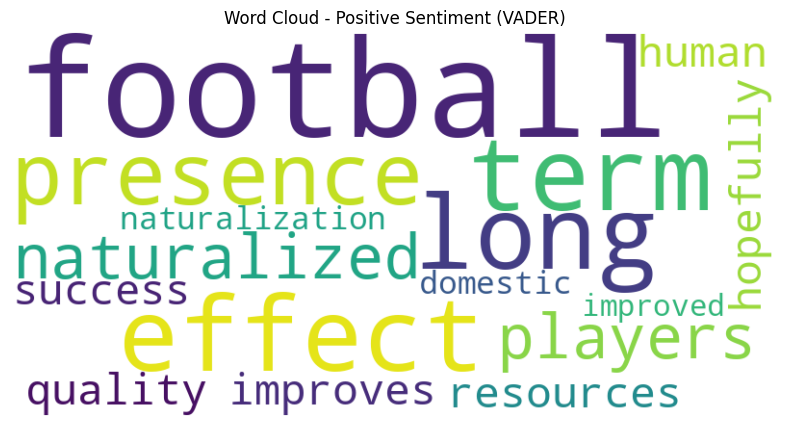

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download resources for VADER
nltk.download('vader_lexicon')

# Data
data = [
    ["the", "long-term", "effect", "of", "the", "presence", "of", "naturalized", "players", "improves", "the", "quality", "of", "football", "human", "resources"],
    ["hopefully", "after", "the", "success", "of", "naturalization", "domestic", "football", "is", "also", "improved"],
    ["Indonesian", "football", "will", "not", "progress", "only", "with", "quality", "foreign", "coaches", "or", "naturalization"]
]

# Konversi data ke bentuk kalimat
sentences = [" ".join(words) for words in data]

# Inisialisasi VADER
sid = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan label sentimen dari skor VADER
def get_sentiment_label(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Analisis Sentimen dengan VADER
positive_sentences = []

for sentence in sentences:
    scores = sid.polarity_scores(sentence)
    sentiment = get_sentiment_label(scores['compound'])

    if sentiment == "positive":
        positive_sentences.append(sentence)

# Gabungkan kalimat menjadi satu string untuk kategori positif
positive_text = " ".join(positive_sentences)

# Buat Word Cloud untuk sentimen positif
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Tampilkan Word Cloud untuk sentimen positif
create_wordcloud(positive_text, "Word Cloud - Positive Sentiment (VADER)")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


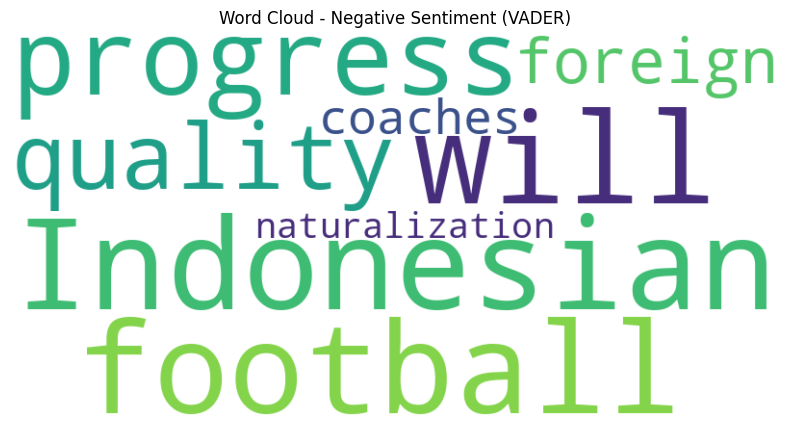

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download resources for VADER
nltk.download('vader_lexicon')

# Data
data = [
    ["the", "long-term", "effect", "of", "the", "presence", "of", "naturalized", "players", "improves", "the", "quality", "of", "football", "human", "resources"],
    ["hopefully", "after", "the", "success", "of", "naturalization", "domestic", "football", "is", "also", "improved"],
    ["Indonesian", "football", "will", "not", "progress", "only", "with", "quality", "foreign", "coaches", "or", "naturalization"]
]

# Konversi data ke bentuk kalimat
sentences = [" ".join(words) for words in data]

# Inisialisasi VADER
sid = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan label sentimen dari skor VADER
def get_sentiment_label(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Analisis Sentimen dengan VADER
negative_sentences = []

for sentence in sentences:
    scores = sid.polarity_scores(sentence)
    sentiment = get_sentiment_label(scores['compound'])

    if sentiment == "negative":
        negative_sentences.append(sentence)

# Gabungkan kalimat menjadi satu string untuk kategori negatif
negative_text = " ".join(negative_sentences)

# Buat Word Cloud untuk sentimen negatif
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Tampilkan Word Cloud untuk sentimen negatif
create_wordcloud(negative_text, "Word Cloud - Negative Sentiment (VADER)")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


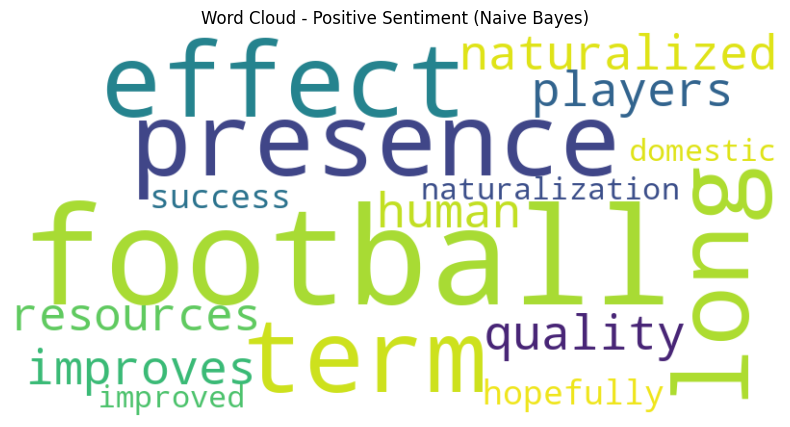

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download resources for VADER
nltk.download('vader_lexicon')

# Data dan Label
data = [
    ["the", "long-term", "effect", "of", "the", "presence", "of", "naturalized", "players", "improves", "the", "quality", "of", "football", "human", "resources"],
    ["hopefully", "after", "the", "success", "of", "naturalization", "domestic", "football", "is", "also", "improved"],
    ["Indonesian", "football", "will", "not", "progress", "only", "with", "quality", "foreign", "coaches", "or", "naturalization"]
]

# Label yang ditentukan secara manual untuk pelatihan Naive Bayes
labels = ["positive", "positive", "neutral"]

# Konversi data ke bentuk kalimat
sentences = [" ".join(words) for words in data]

# Buat pipeline untuk preprocessing dan klasifikasi
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Latih model
model.fit(sentences, labels)

# Prediksi sentimen
predicted_labels = model.predict(sentences)

# Pisahkan kalimat berdasarkan sentimen
positive_sentences_nb = [sentences[i] for i in range(len(sentences)) if predicted_labels[i] == "positive"]

# Gabungkan kalimat menjadi satu string untuk kategori positif
positive_text_nb = " ".join(positive_sentences_nb)

# Buat Word Cloud untuk sentimen positif
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Tampilkan Word Cloud untuk sentimen positif dari Naive Bayes
create_wordcloud(positive_text_nb, "Word Cloud - Positive Sentiment (Naive Bayes)")


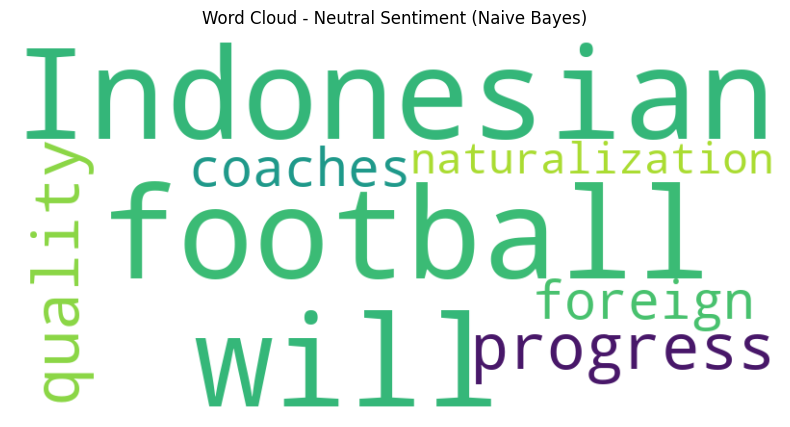

In [22]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Data dan Label
data = [
    ["the", "long-term", "effect", "of", "the", "presence", "of", "naturalized", "players", "improves", "the", "quality", "of", "football", "human", "resources"],
    ["hopefully", "after", "the", "success", "of", "naturalization", "domestic", "football", "is", "also", "improved"],
    ["Indonesian", "football", "will", "not", "progress", "only", "with", "quality", "foreign", "coaches", "or", "naturalization"]
]

# Label yang ditentukan secara manual untuk pelatihan Naive Bayes
labels = ["positive", "positive", "neutral"]

# Konversi data ke bentuk kalimat
sentences = [" ".join(words) for words in data]

# Buat pipeline untuk preprocessing dan klasifikasi
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Latih model
model.fit(sentences, labels)

# Prediksi sentimen
predicted_labels = model.predict(sentences)

# Pisahkan kalimat berdasarkan sentimen netral
neutral_sentences_nb = [sentences[i] for i in range(len(sentences)) if predicted_labels[i] == "neutral"]

# Gabungkan kalimat menjadi satu string untuk kategori netral
neutral_text_nb = " ".join(neutral_sentences_nb)

# Buat Word Cloud untuk sentimen netral
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Tampilkan Word Cloud untuk sentimen netral dari Naive Bayes
if neutral_text_nb:  # Hanya tampilkan jika ada teks untuk sentimen netral
    create_wordcloud(neutral_text_nb, "Word Cloud - Neutral Sentiment (Naive Bayes)")


In [23]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Data dan Label
data = [
    ["the", "long-term", "effect", "of", "the", "presence", "of", "naturalized", "players", "improves", "the", "quality", "of", "football", "human", "resources"],
    ["hopefully", "after", "the", "success", "of", "naturalization", "domestic", "football", "is", "also", "improved"],
    ["Indonesian", "football", "will", "not", "progress", "only", "with", "quality", "foreign", "coaches", "or", "naturalization"]
]

# Label yang ditentukan secara manual untuk pelatihan Naive Bayes
labels = ["positive", "positive", "negative"]

# Konversi data ke bentuk kalimat
sentences = [" ".join(words) for words in data]

# Buat pipeline untuk preprocessing dan klasifikasi
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Latih model
model.fit(sentences, labels)

# Prediksi sentimen
predicted_labels = model.predict(sentences)

# Tampilkan hasil prediksi
for sentence, label in zip(sentences, predicted_labels):
    print(f"Kalimat: {sentence}\nPrediksi Sentimen: {label}\n")


Kalimat: the long-term effect of the presence of naturalized players improves the quality of football human resources
Prediksi Sentimen: positive

Kalimat: hopefully after the success of naturalization domestic football is also improved
Prediksi Sentimen: positive

Kalimat: Indonesian football will not progress only with quality foreign coaches or naturalization
Prediksi Sentimen: negative

